<a href="https://colab.research.google.com/github/ASHIKAMOHAN/Sales_Forecasting/blob/main/Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:

file_path = '/content/drive/MyDrive/ML Data 3.csv'
sales_df = pd.read_csv(file_path)

print(sales_df)

          Rows No  Location ID    DealDate Currency Type  Type  Amount  \
0        28937647          140  04/01/2022      JMD    N     S   77000   
1        28937648          140  04/01/2022      XCD    N     S    1000   
2        28937649          140  04/01/2022      KRW    N     S  910000   
3        28937650          140  04/01/2022      EUR    N     S     705   
4        28937651          140  04/01/2022      TRY    N     S    3215   
...           ...          ...         ...      ...  ...   ...     ...   
8234155  46696722           38  30/04/2025      EUR    N     S     335   
8234156  46696723           38  30/04/2025      EUR    N     B     200   
8234157  46696724           38  30/04/2025      EUR    N     S     100   
8234158  46696725           38  30/04/2025      JPY    N     S   27000   
8234159  46696726          272  29/04/2025      EUR    N     S     340   

          Value  OriginationID  OrderTypeID  Reatils rate  
0        401.68              2            2      19

In [10]:
sales_df.info()
print("\nMissing values:\n", sales_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8234160 entries, 0 to 8234159
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Rows No        int64  
 1   Location ID    int64  
 2   DealDate       object 
 3   Currency       object 
 4   Type           object 
 5    Type          object 
 6   Amount         int64  
 7   Value          float64
 8   OriginationID  int64  
 9   OrderTypeID    int64  
 10  Reatils rate   float64
dtypes: float64(2), int64(5), object(4)
memory usage: 691.0+ MB

Missing values:
 Rows No          0
Location ID      0
DealDate         0
Currency         0
Type             0
 Type            0
Amount           0
Value            0
OriginationID    0
OrderTypeID      0
Reatils rate     0
dtype: int64


In [11]:
sales_df.describe(include='all')


,Rows No,Location ID,DealDate,Currency,Type,Type,Amount,Value,OriginationID,OrderTypeID,Reatils rate
count,8.234160e+06,8.234160e+06,8234160,8234160,8234160,8234160,8.234160e+06,8.234160e+06,8.234160e+06,8.234160e+06,8.234160e+06
unique,NaN,NaN,1207,80,4,2,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,01/07/2023,EUR,N,S,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,12483,4843567,8225921,5847039,NaN,NaN,NaN,NaN,NaN
mean,3.796139e+07,1.090322e+02,NaN,NaN,NaN,NaN,3.354511e+04,3.150834e+02,2.883117e+00,1.327956e+00,1.444984e+02
std,5.114054e+06,6.180224e+01,NaN,NaN,NaN,NaN,6.437986e+05,5.100350e+02,6.474854e-01,7.160172e-01,1.802482e+03
min,2.893765e+07,5.000000e+00,NaN,NaN,NaN,NaN,0.000000e+00,1.000000e-02,1.000000e+00,1.000000e+00,2.700000e-03
25%,3.357164e+07,5.900000e+01,NaN,NaN,NaN,NaN,1.000000e+02,6.787000e+01,3.000000e+00,1.000000e+00,1.122700e+00
50%,3.802677e+07,1.060000e+02,NaN,NaN,NaN,NaN,2.850000e+02,1.702600e+02,3.000000e+00,1.000000e+00,1.206000e+00
75%,4.250761e+07,1.490000e+02,NaN,NaN,NaN,NaN,8.000000e+02,3.934900e+02,3.000000e+00,1.000000e+00,1.483300e+00


In [12]:
sales_df['DealDate'] = pd.to_datetime(sales_df['DealDate'], dayfirst=True)


In [14]:
print("Unique currencies:", sales_df['Currency'].nunique())
print("Top 5 currencies:\n", sales_df['Currency'].value_counts().head())

print("\nTransaction types:", sales_df['Type'].value_counts())
print("Order types:\n", sales_df['OrderTypeID'].value_counts())


Unique currencies: 80
Top 5 currencies:
 Currency
EUR    4843567
USD    1328549
TRY     356757
PLN     144063
AUD     126303
Name: count, dtype: int64

Transaction types: Type
N    8225921
T       6041
V       2194
Z          4
Name: count, dtype: int64
Order types:
 OrderTypeID
1    6732604
3    1189977
2     307125
4       4454
Name: count, dtype: int64


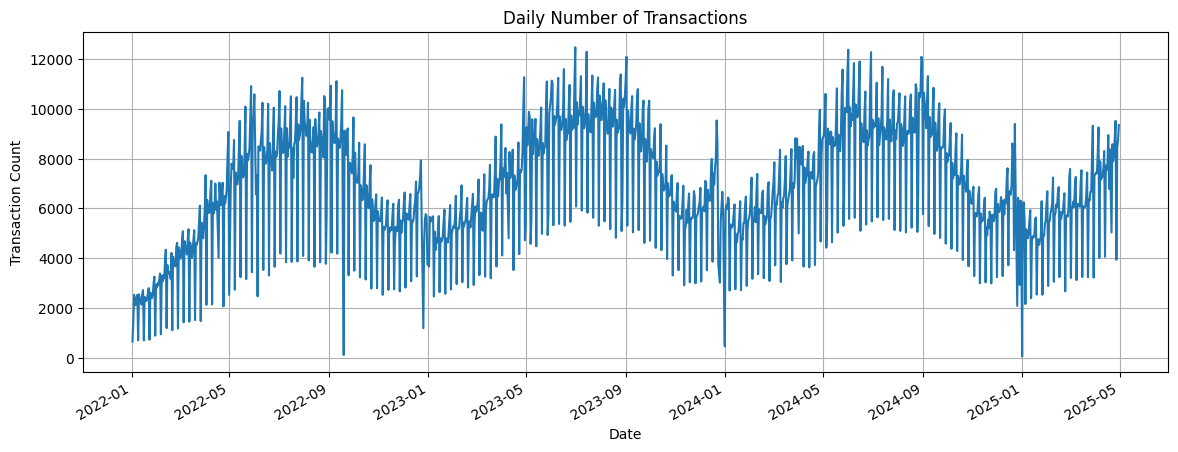

In [16]:
daily_trx = sales_df.groupby('DealDate').size()

plt.figure(figsize=(14, 5))
daily_trx.plot()
plt.title('Daily Number of Transactions')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.grid(True)
plt.show()


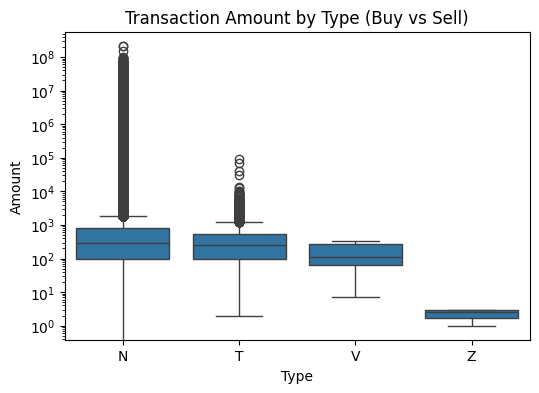

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Type', y='Amount', data=sales_df)
plt.title('Transaction Amount by Type (Buy vs Sell)')
plt.yscale('log')
plt.show()


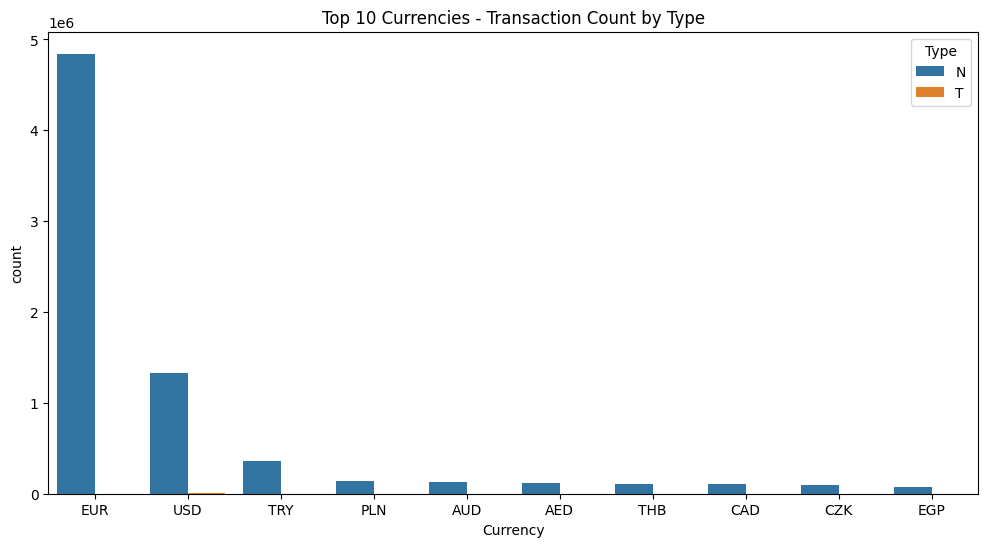

In [19]:
top_currencies = sales_df['Currency'].value_counts().head(10).index
df_top = sales_df[sales_df['Currency'].isin(top_currencies)]

plt.figure(figsize=(12,6))
sns.countplot(data=df_top, x='Currency', order=top_currencies, hue='Type')
plt.title('Top 10 Currencies - Transaction Count by Type')
#plt.xticks(rotation=45)
plt.show()


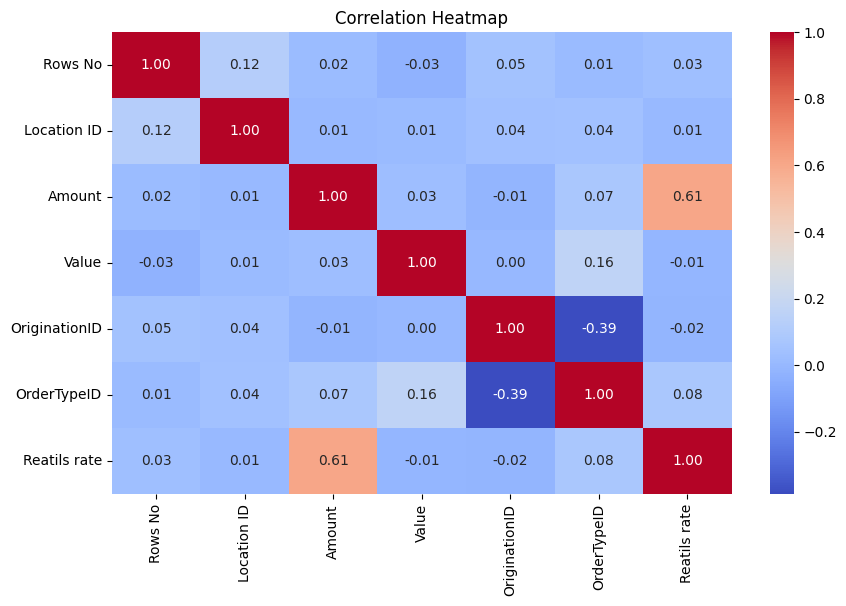

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(sales_df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


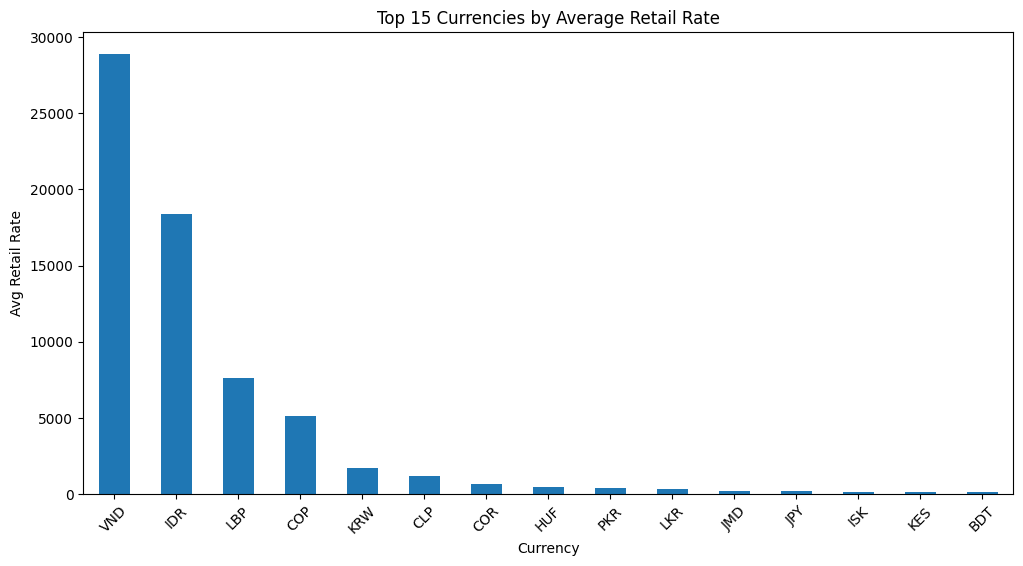

In [21]:
avg_rates = sales_df.groupby('Currency')['Reatils rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
avg_rates.head(15).plot(kind='bar')
plt.title('Top 15 Currencies by Average Retail Rate')
plt.ylabel('Avg Retail Rate')
plt.xticks(rotation=45)
plt.show()


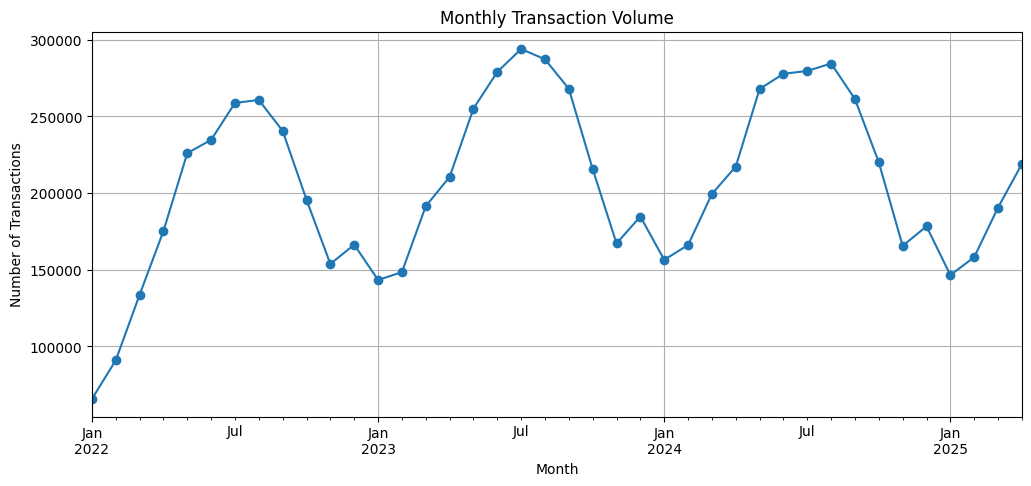

In [22]:
sales_df['Month'] = sales_df['DealDate'].dt.to_period('M')
monthly_trx = sales_df.groupby('Month').size()

monthly_trx.plot(figsize=(12, 5), marker='o')
plt.title('Monthly Transaction Volume')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()


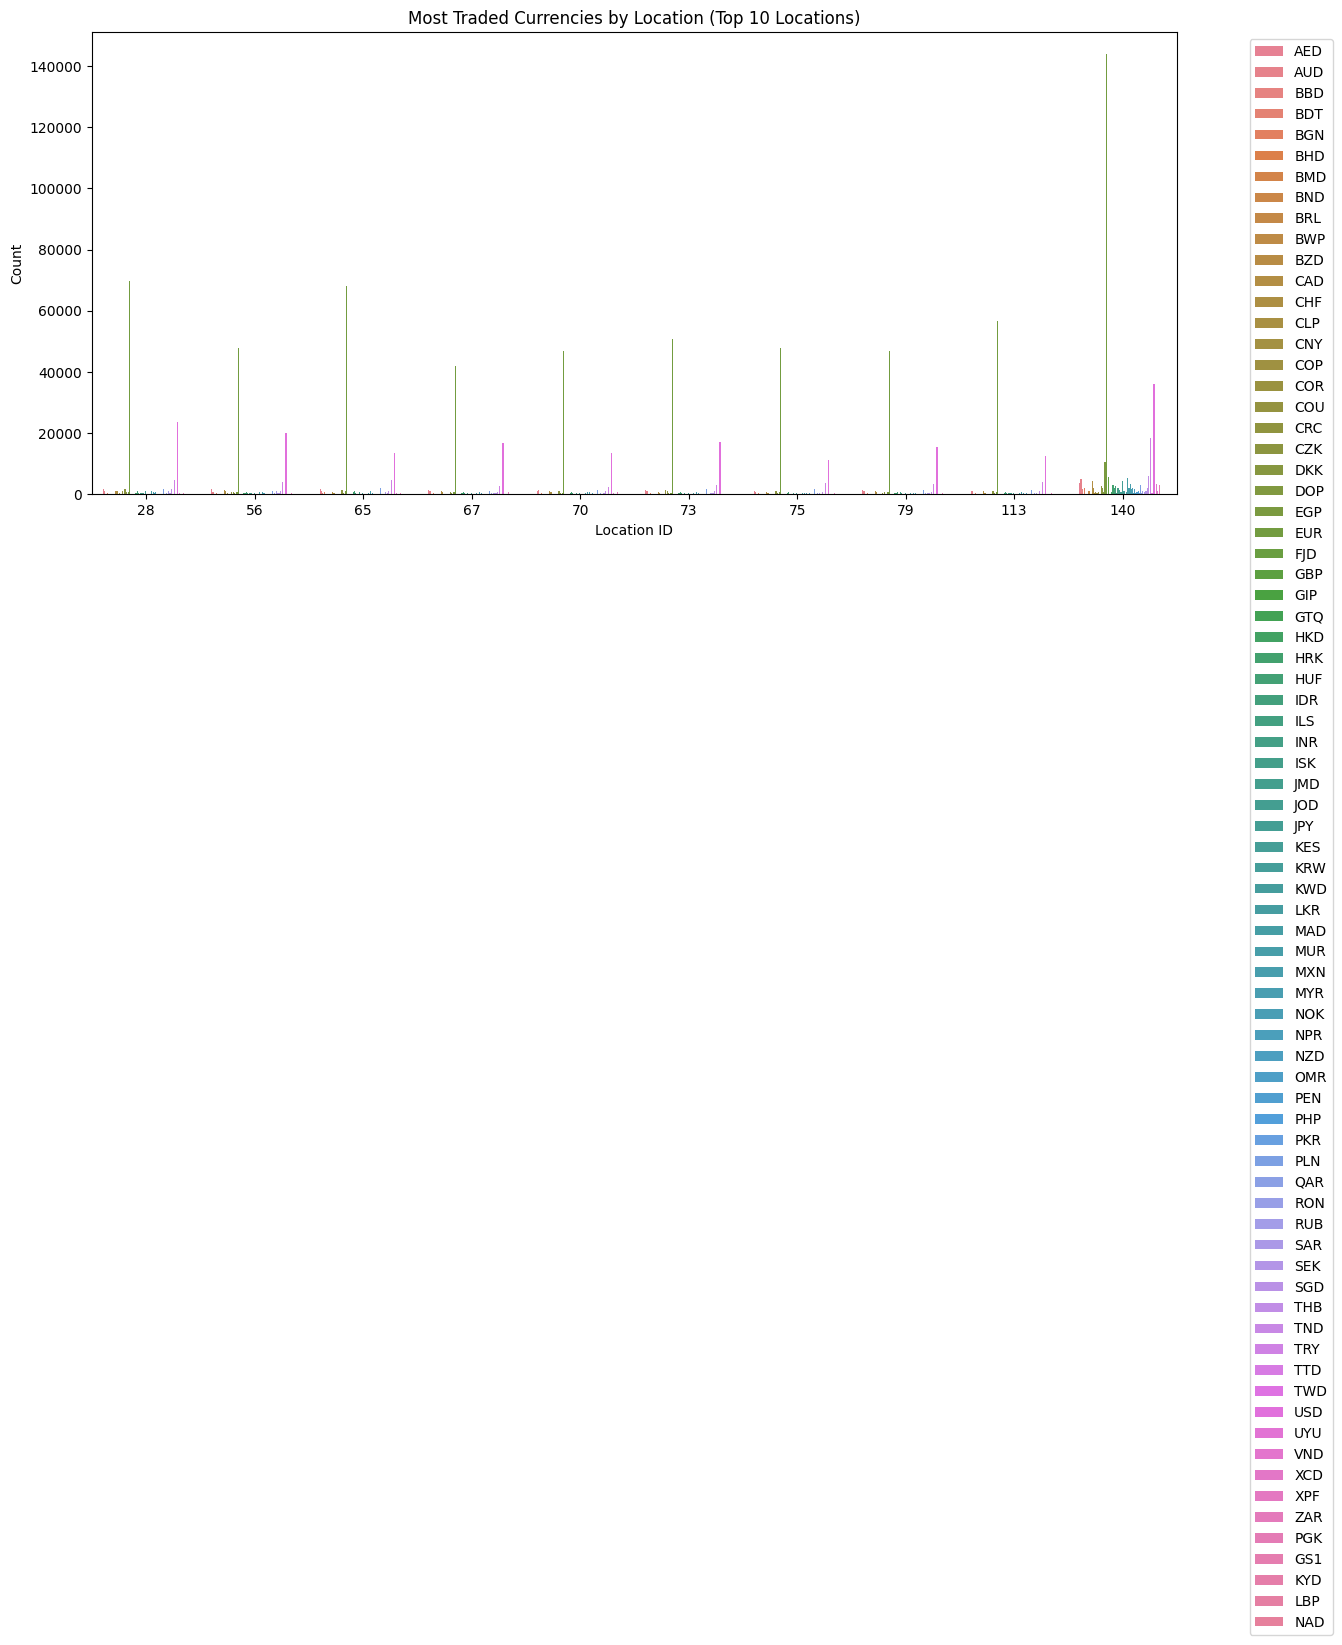

In [23]:
# Count of currency transactions per location
currency_by_location = sales_df.groupby(['Location ID', 'Currency']).size().reset_index(name='Count')

# Get top 10 locations with highest variety of currencies traded
top_locations = currency_by_location.groupby('Location ID')['Count'].sum().sort_values(ascending=False).head(10).index
filtered = currency_by_location[currency_by_location['Location ID'].isin(top_locations)]

plt.figure(figsize=(14,6))
sns.barplot(data=filtered, x='Location ID', y='Count', hue='Currency')
plt.title('Most Traded Currencies by Location (Top 10 Locations)')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


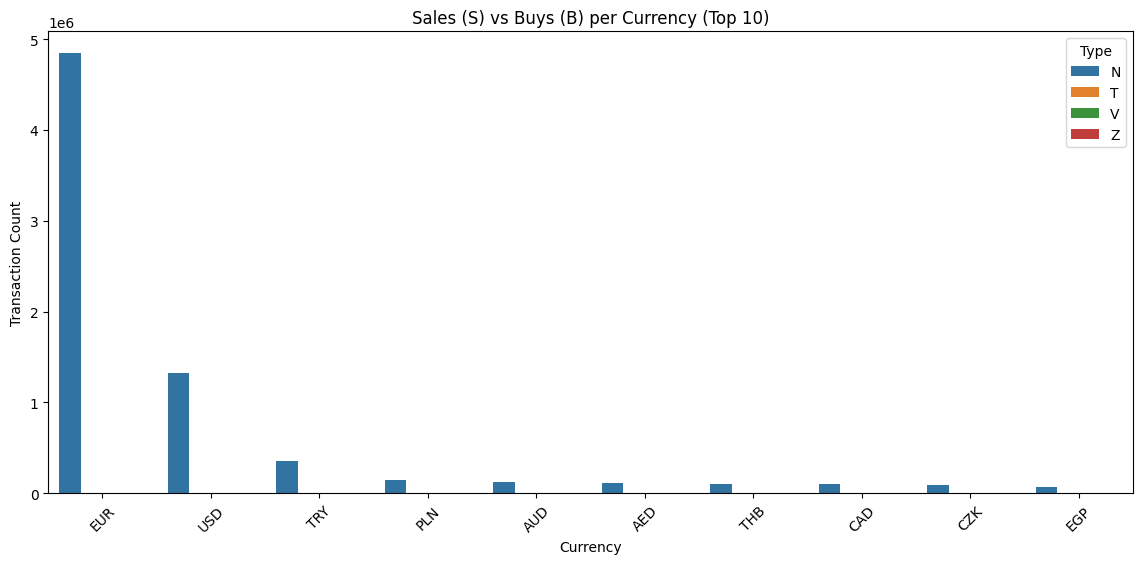

In [24]:
plt.figure(figsize=(14, 6))
sns.countplot(data=sales_df, x='Currency', order=sales_df['Currency'].value_counts().head(10).index, hue='Type')
plt.title('Sales (S) vs Buys (B) per Currency (Top 10)')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.show()


In [25]:
# Define thresholds for outliers (adjust as needed)
amount_threshold = sales_df['Amount'].quantile(0.999)  # Top 0.1%
value_threshold = sales_df['Value'].quantile(0.999)

high_amount = sales_df[sales_df['Amount'] > amount_threshold]
high_value = sales_df[sales_df['Value'] > value_threshold]

print("🔍 Transactions with unusually high 'Amount':", high_amount.shape[0])
print(high_amount[['DealDate', 'Currency', 'Amount', 'Value']].sort_values(by='Amount', ascending=False).head())

print("\n🔍 Transactions with unusually high 'Value':", high_value.shape[0])
print(high_value[['DealDate', 'Currency', 'Amount', 'Value']].sort_values(by='Value', ascending=False).head())


🔍 Transactions with unusually high 'Amount': 8226
          DealDate Currency     Amount    Value
2666124 2023-03-29      VND  216600000  6255.44
2484734 2023-02-28      VND  206000000  6003.13
4496004 2023-11-08      VND  146500000  5501.42
690267  2022-05-25      VND  100000000  3033.85
5857737 2024-06-27      IDR   95650000  5001.05

🔍 Transactions with unusually high 'Value': 8235
          DealDate Currency  Amount     Value
6875899 2024-09-20      USD  120000  95777.80
5910204 2024-06-06      USD  114400  85043.12
7589978 2025-01-15      EUR   99850  82500.21
5151102 2024-02-27      USD  100000  75001.88
4293975 2023-10-02      USD   86900  67104.25


In [26]:
top_currencies = sales_df['Currency'].value_counts().head(5).index
df_top = sales_df[sales_df['Currency'].isin(top_currencies)]


In [27]:
# Group by date and currency, sum Amount
currency_trend = df_top.groupby(['DealDate', 'Currency'])['Amount'].sum().reset_index()


In [28]:
pivot_trend = currency_trend.pivot(index='DealDate', columns='Currency', values='Amount')
#pivot_trend = pivot_trend.fillna(0)  # fill missing dates with 0


<Figure size 1400x600 with 0 Axes>

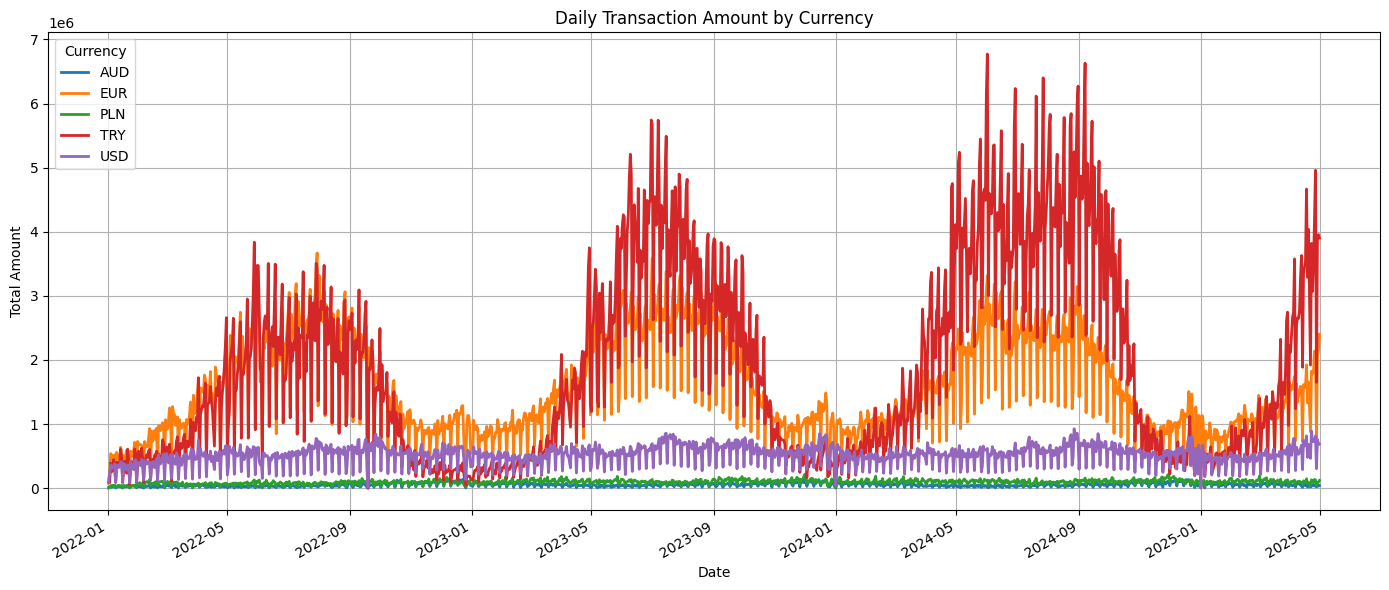

In [29]:
plt.figure(figsize=(14, 6))
pivot_trend.plot(figsize=(14,6), linewidth=2)

plt.title('Daily Transaction Amount by Currency')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.legend(title='Currency', loc='upper left')
plt.tight_layout()
plt.show()


In [31]:
# Use 'Value' instead of 'Amount' for GBP-standardized comparison
currency_value_trend = df_top.groupby(['DealDate', 'Currency'])['Value'].sum().reset_index()


In [32]:
pivot_value_trend = currency_value_trend.pivot(index='DealDate', columns='Currency', values='Value').fillna(0)


<Figure size 1400x600 with 0 Axes>

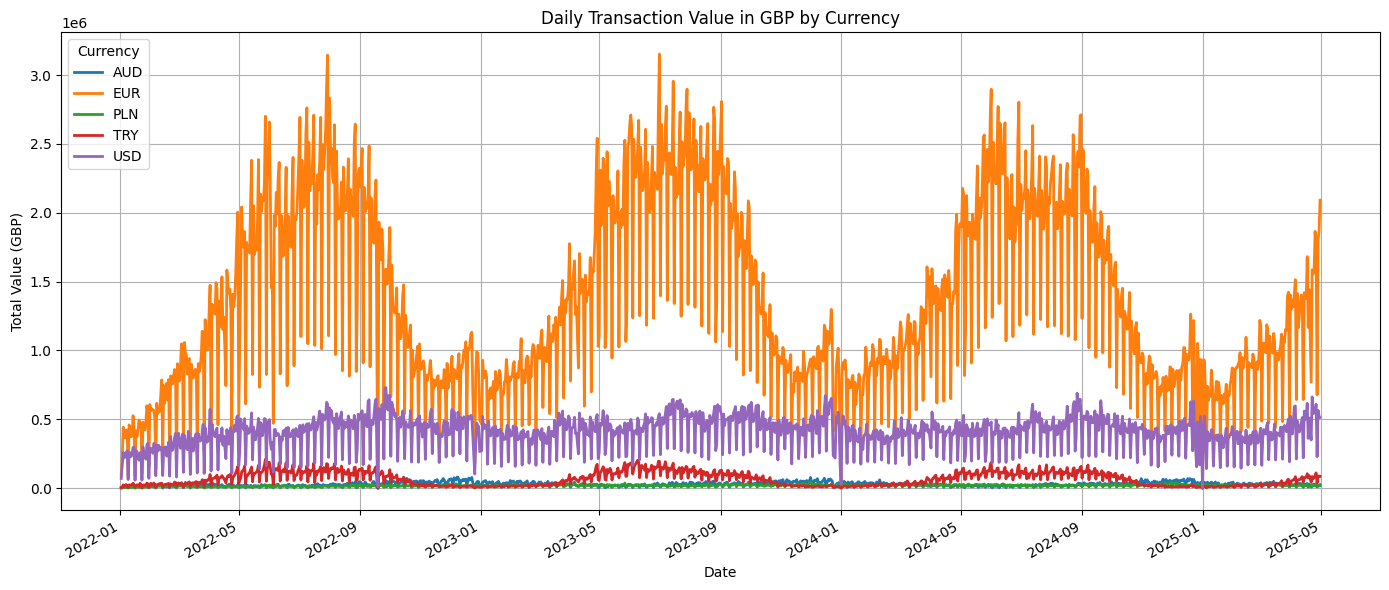

In [33]:
plt.figure(figsize=(14, 6))
pivot_value_trend.plot(figsize=(14,6), linewidth=2)

plt.title('Daily Transaction Value in GBP by Currency')
plt.xlabel('Date')
plt.ylabel('Total Value (GBP)')
plt.grid(True)
plt.legend(title='Currency', loc='upper left')
plt.tight_layout()
plt.show()
